In [76]:
import pickle
from pathlib import Path
from constants import globals as g


activity = 'slide'
participant_no = 1
PARENT_DIR = Path(g.PROJECT_DIR, "data", "grossmotor-pose", "center-cropped").__str__()
data = Path(PARENT_DIR, f"center-{participant_no}_{activity}_2_2.pkl").__str__()

with open(data, 'rb') as f: 
    pkl_data = pickle.load(f)

pkl_data['keypoint'].shape

(1, 30, 17, 2)

In [77]:
pkl_data['frame_dir']

'center-1_slide_2_2'

### Generating GIFs

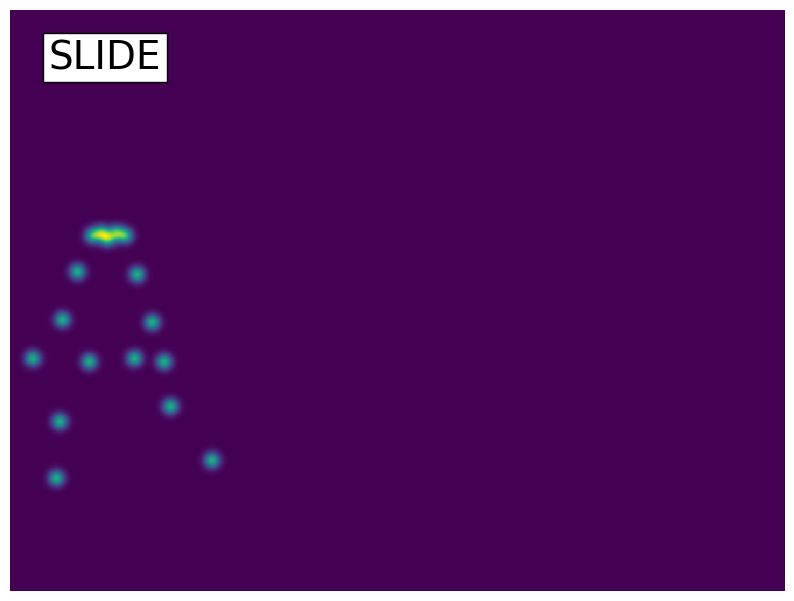

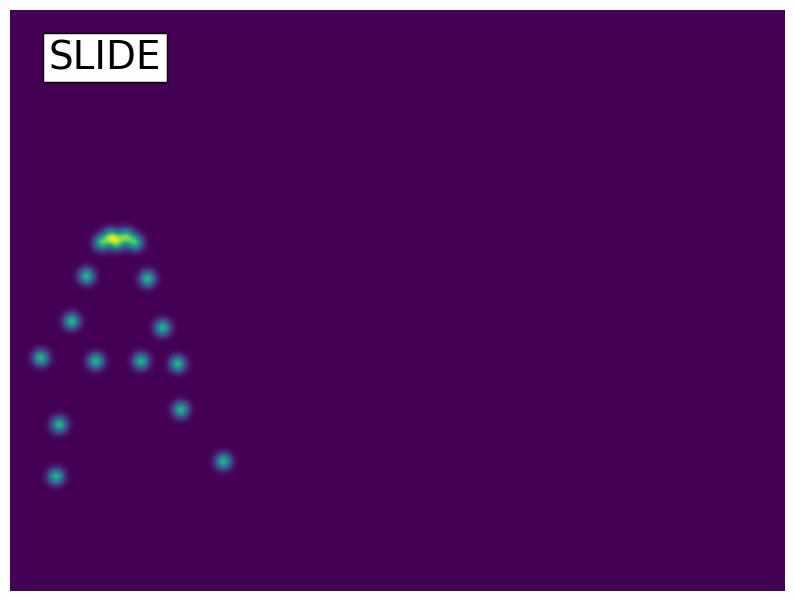

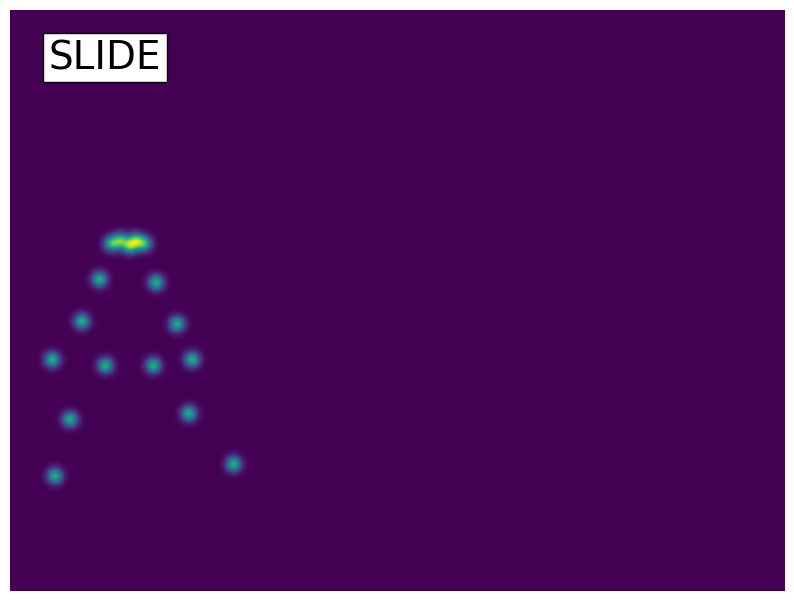

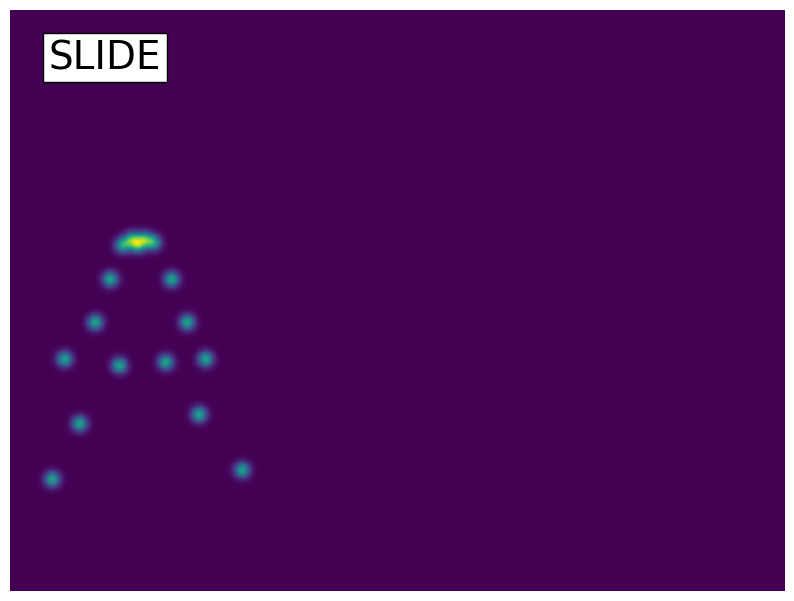

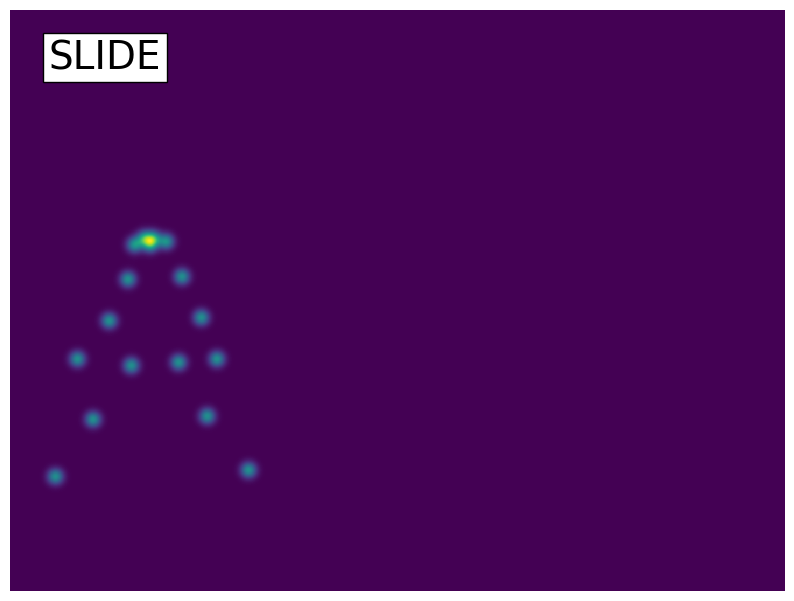

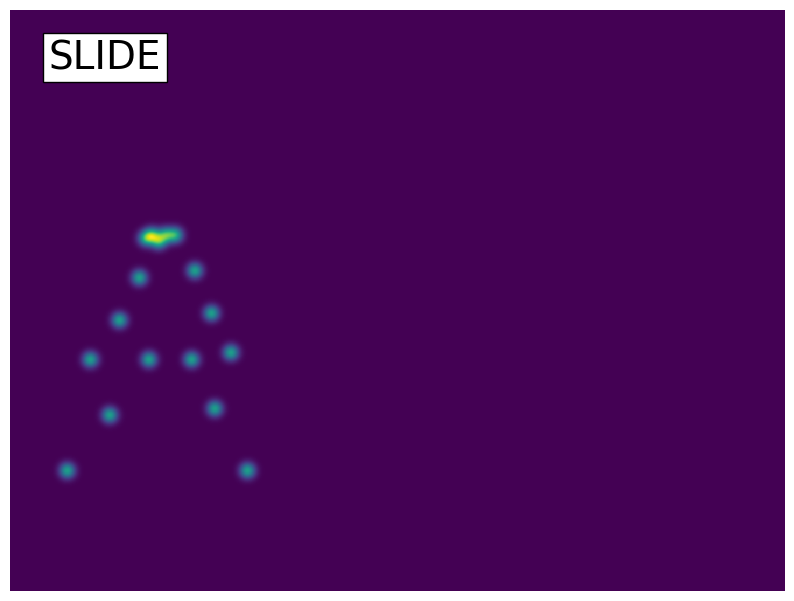

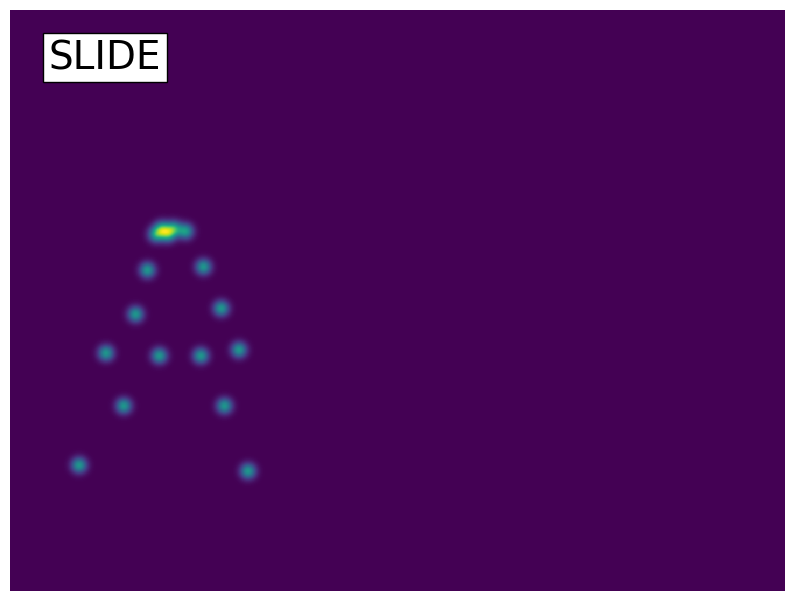

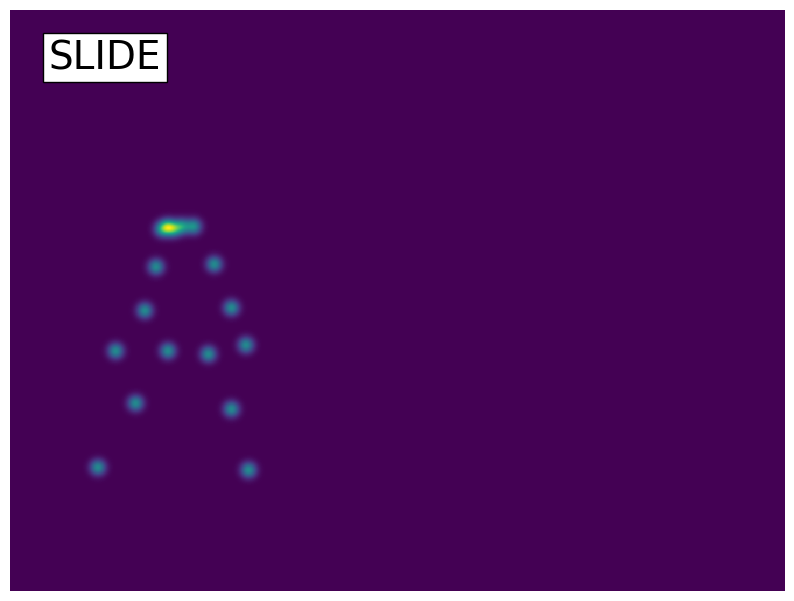

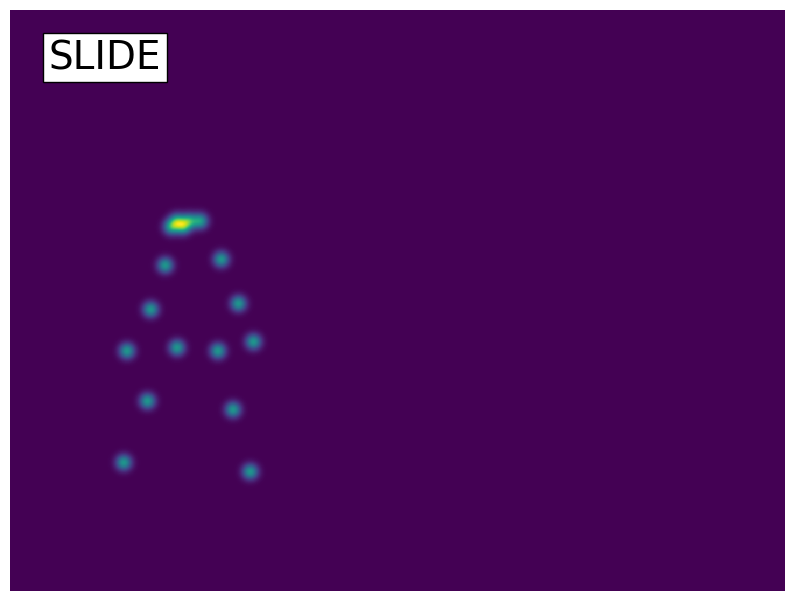

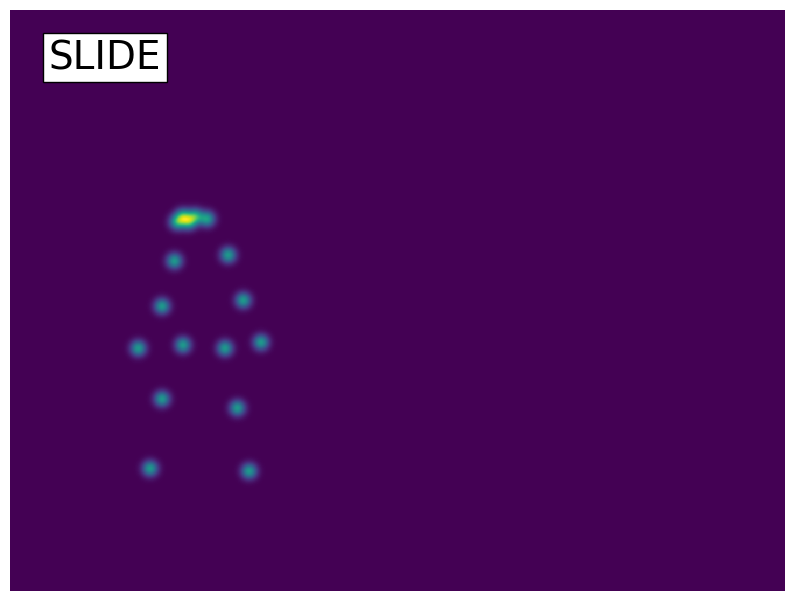

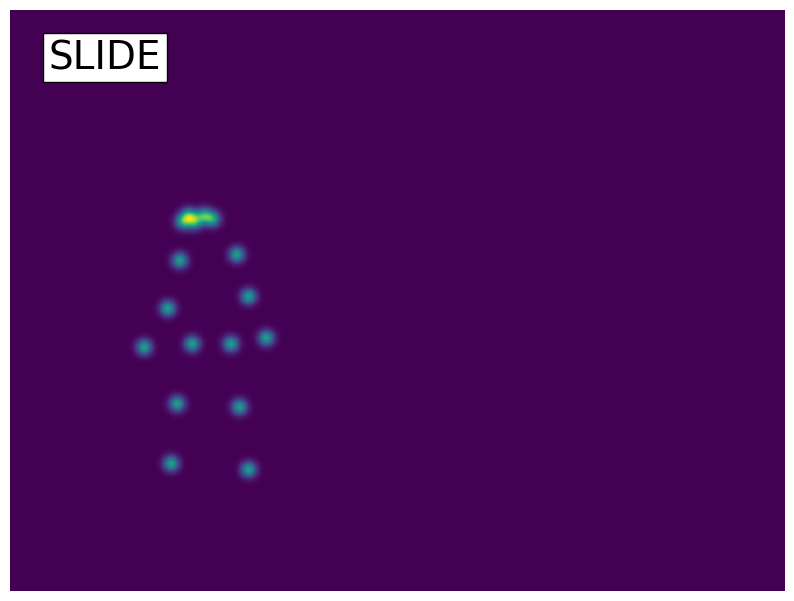

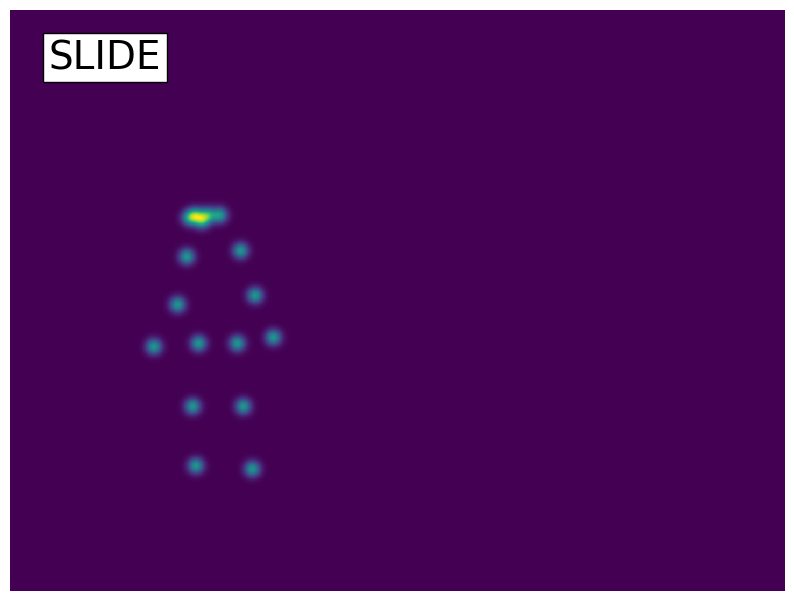

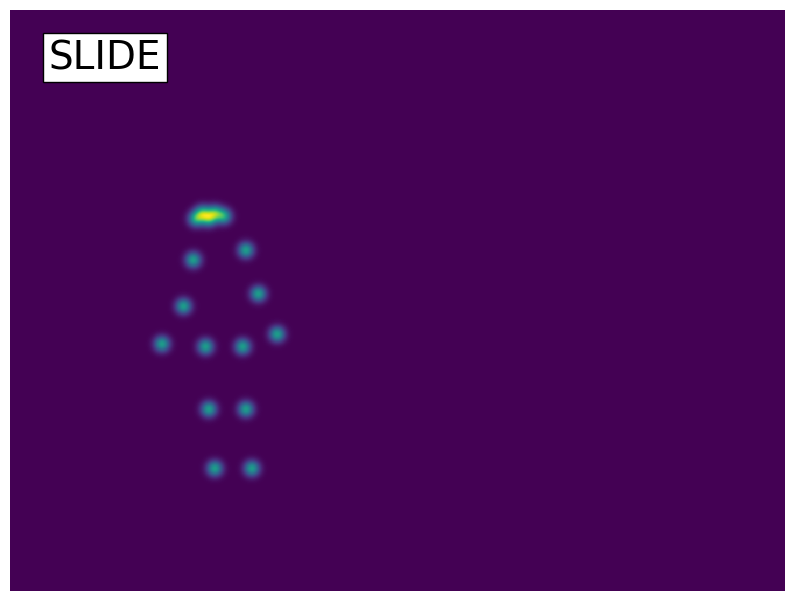

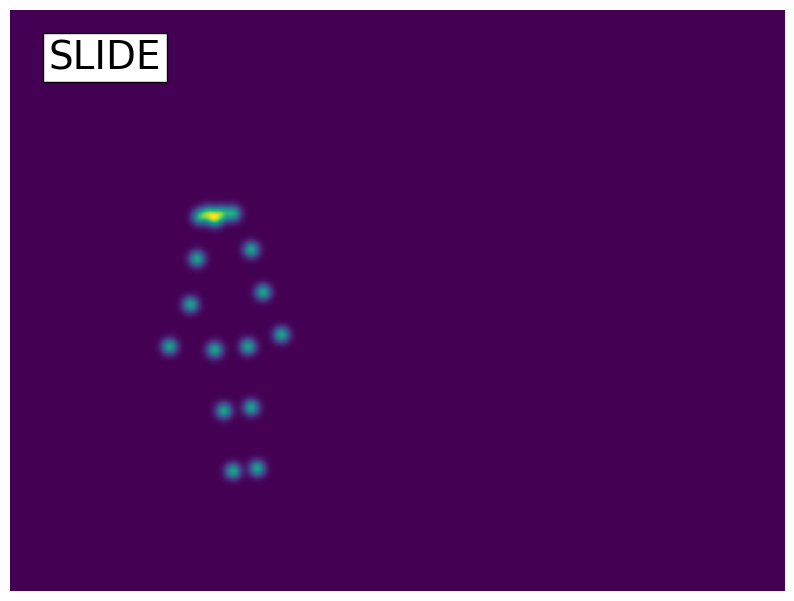

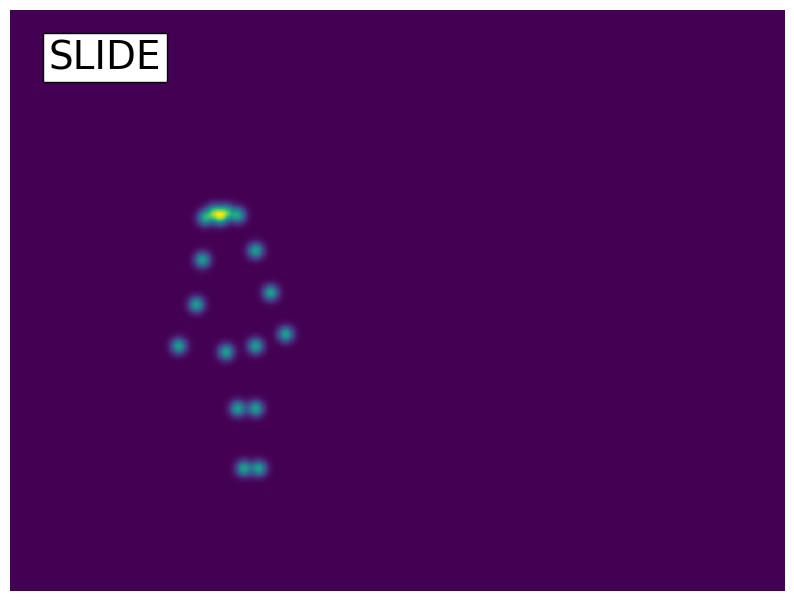

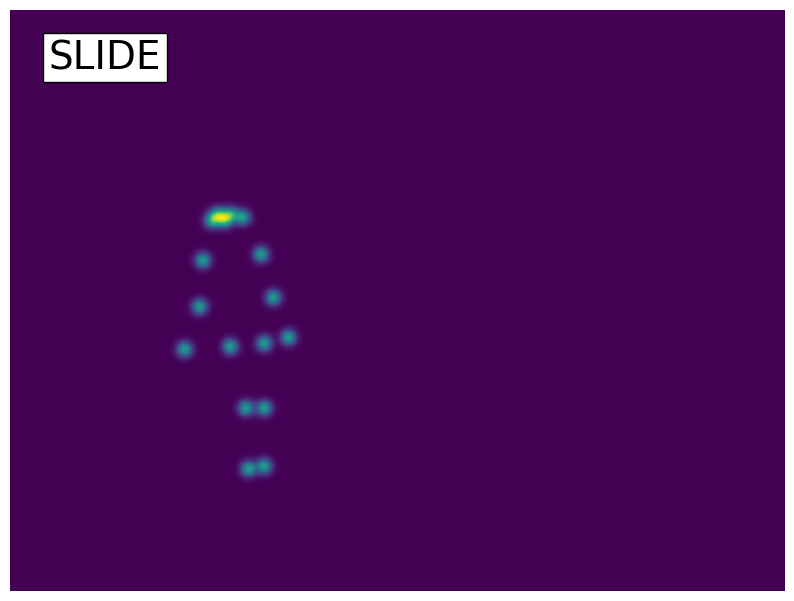

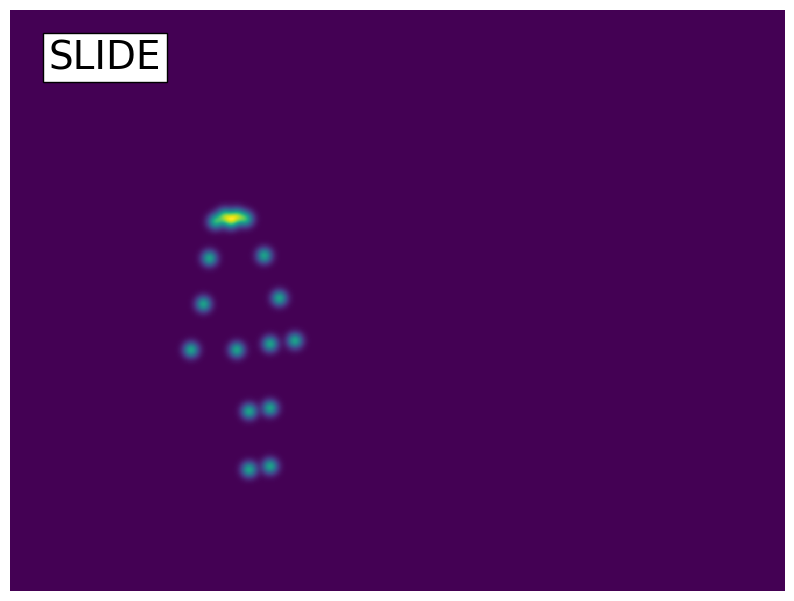

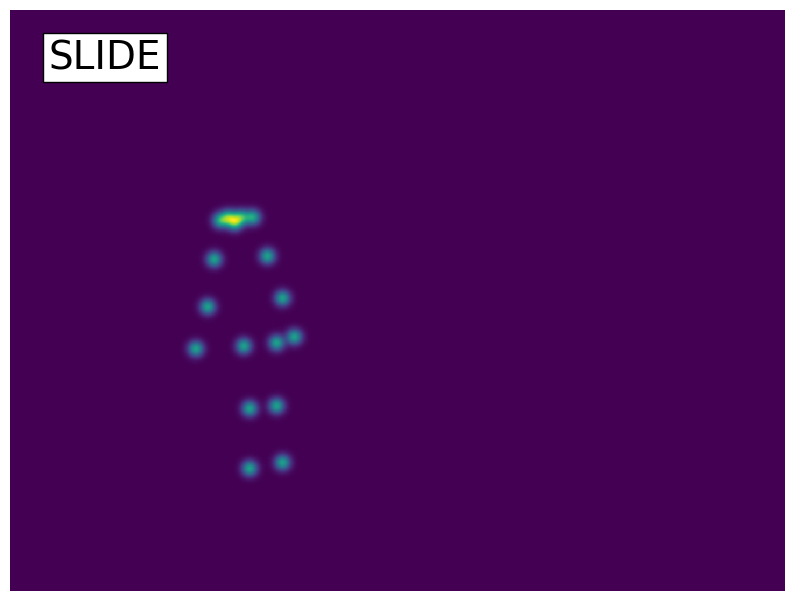

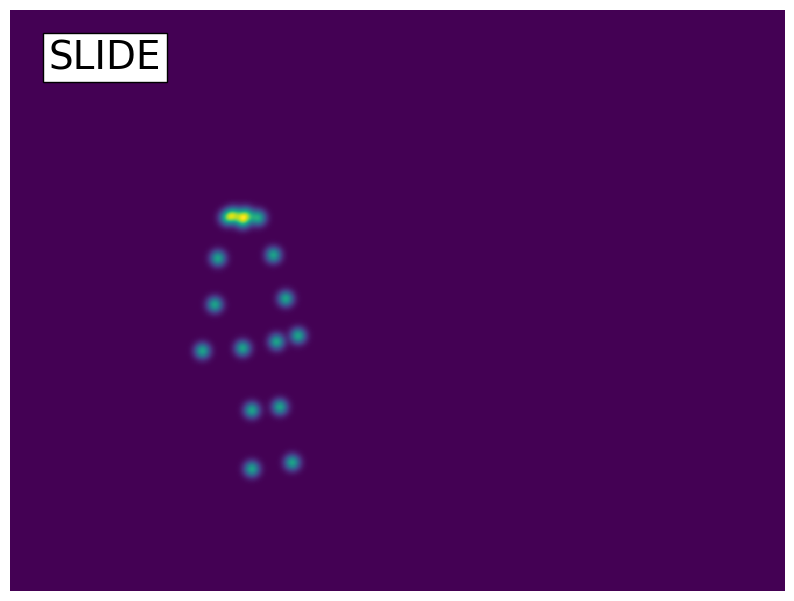

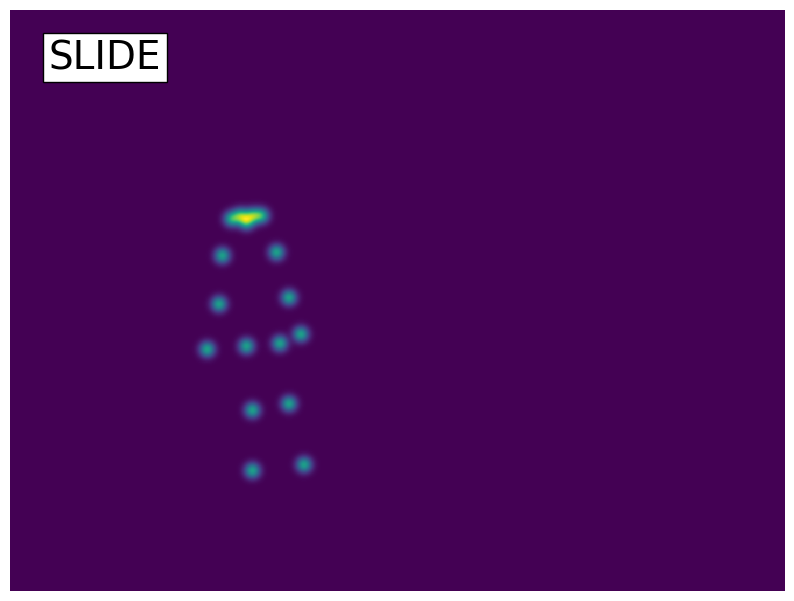

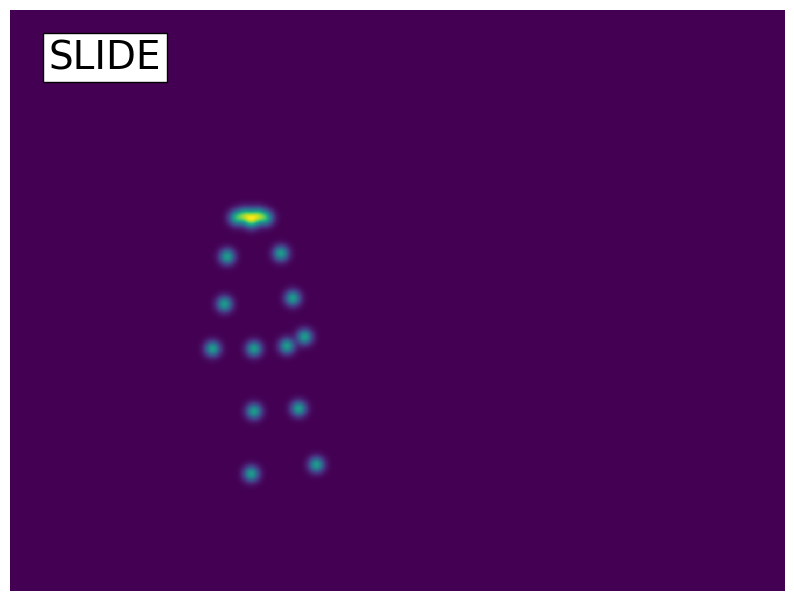

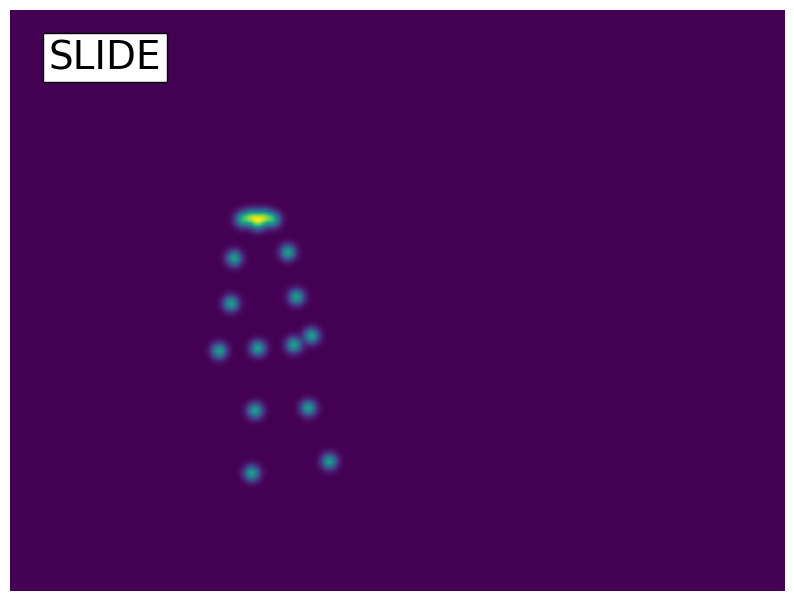

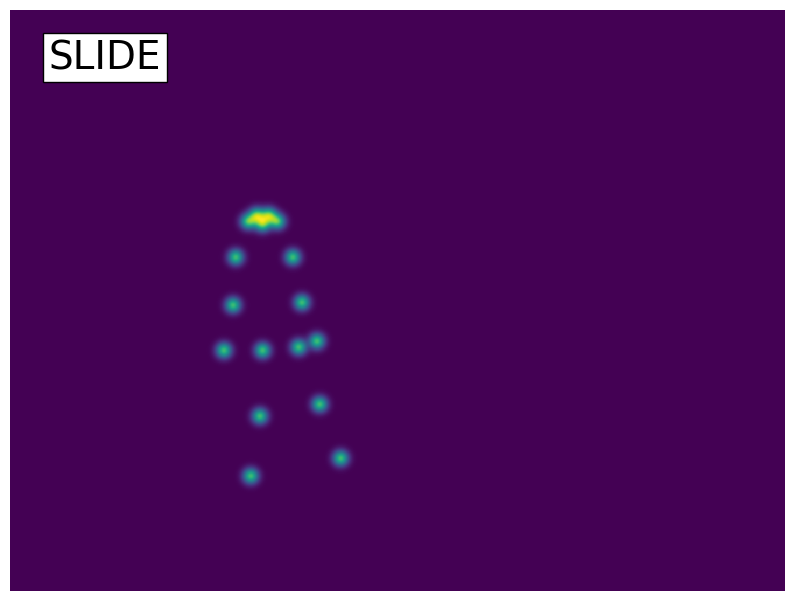

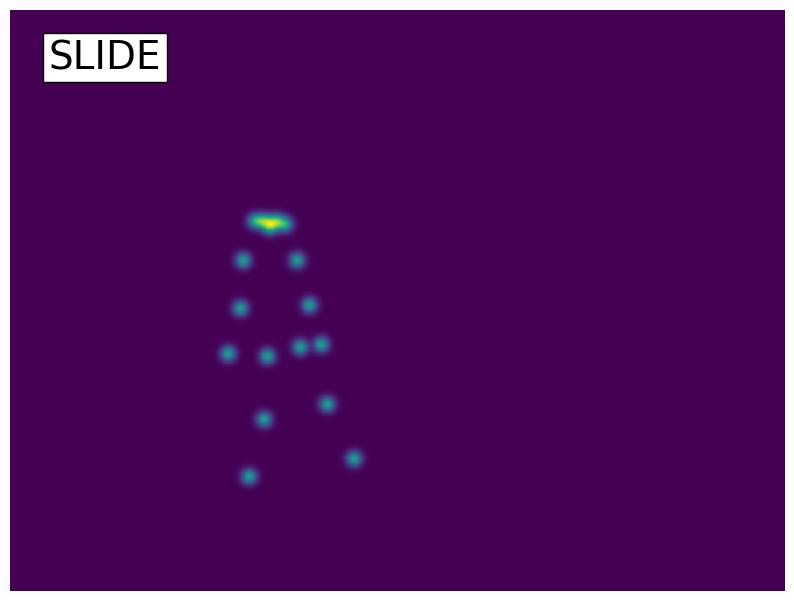

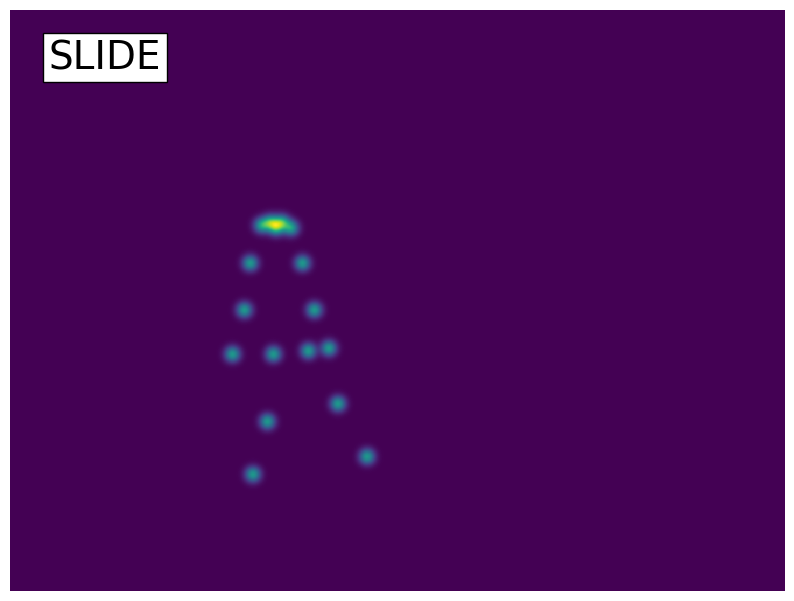

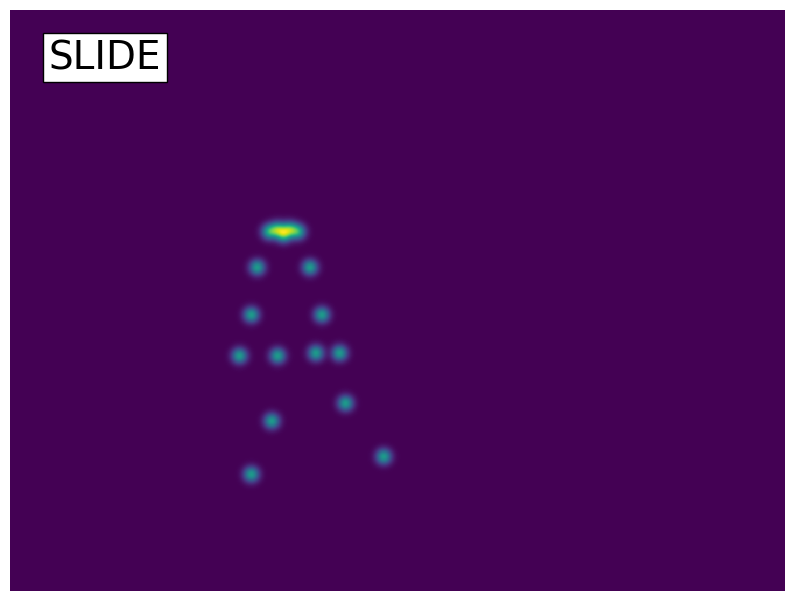

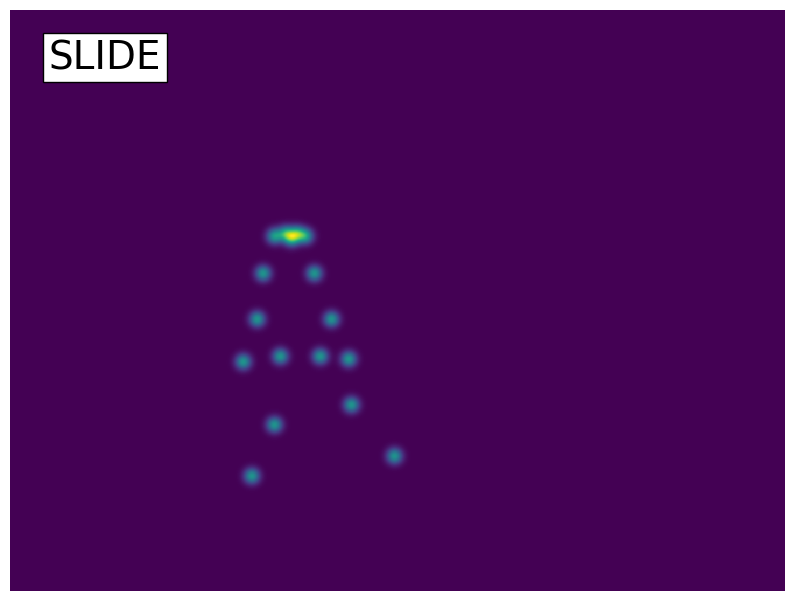

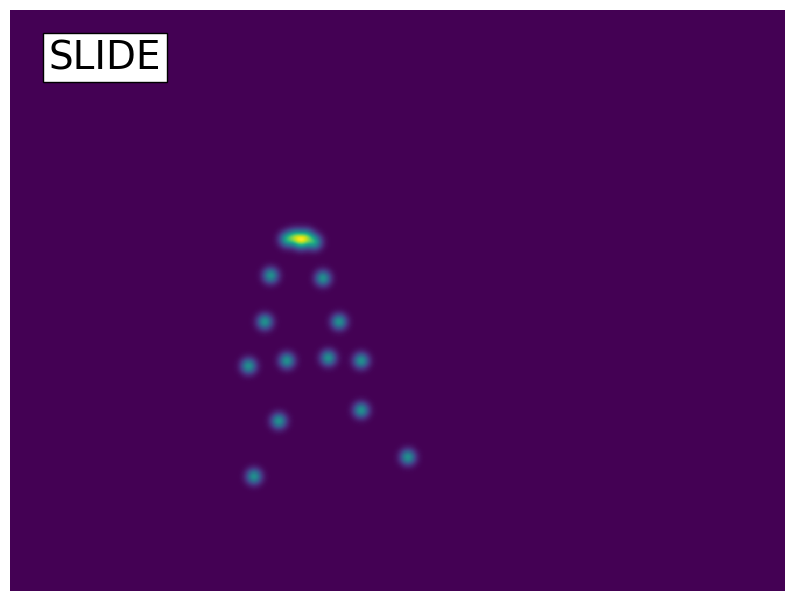

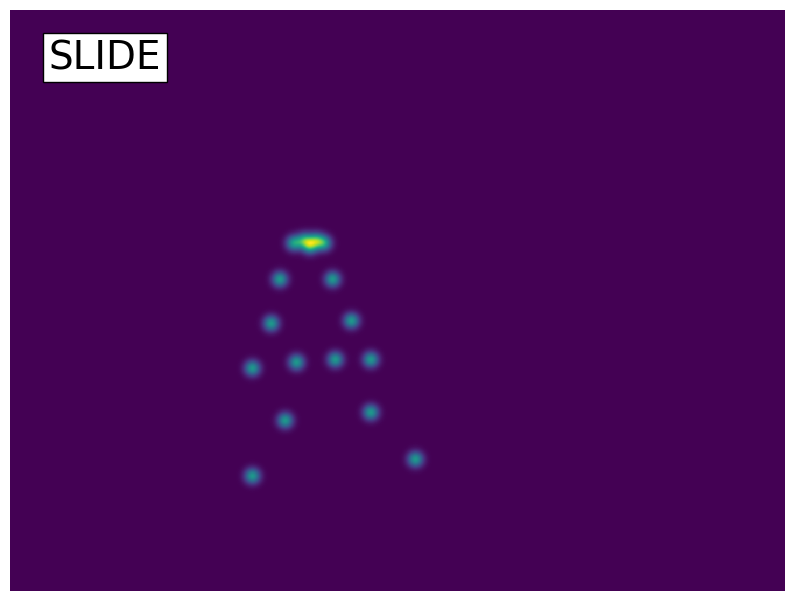

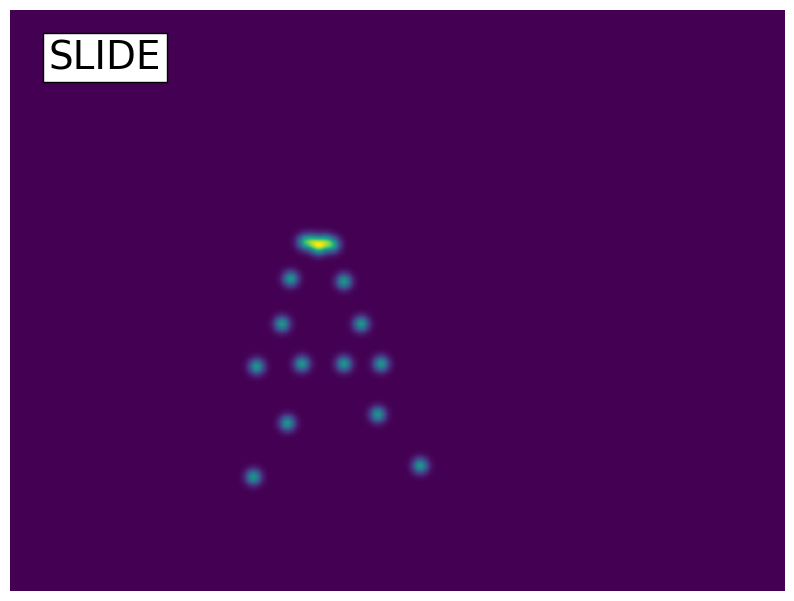

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import imageio
import io

# Assuming pkl_data is already defined
frames = []
num_frames = len(pkl_data['keypoint'][0])

for frame_index in range(num_frames):
    keypoints = pkl_data['keypoint'][0][frame_index]  

    heatmap = np.zeros(pkl_data['img_shape'][:2])

    spread = 10  
    for joint in keypoints:
        x, y = int(joint[0]), int(joint[1])  
        if 0 <= x < heatmap.shape[1] and 0 <= y < heatmap.shape[0]:
            heatmap[y, x] = 1  

    heatmap_blurred = gaussian_filter(heatmap, sigma=spread)
    heatmap_normalized = heatmap_blurred / heatmap_blurred.max()

    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(heatmap_normalized, interpolation='nearest')
    ax.axis('off')
    ax.text(0.05, 0.95, activity.upper(), transform=ax.transAxes, fontsize=28,
            verticalalignment='top', bbox=dict(facecolor='white', alpha=1))
    # plt.title(activity.upper(), fontsize=20)
    plt.show()
    
    
    

    # Save the frame to a buffer
    # buf = io.BytesIO()
    # plt.savefig(buf, format='png', bbox_inches='tight', pad_inches=0)
    # buf.seek(0)
    # frames.append(imageio.imread(buf))
    # plt.close(fig)

# imageio.mimsave(f"{pkl_data['frame_dir']}.gif", frames, duration=1)

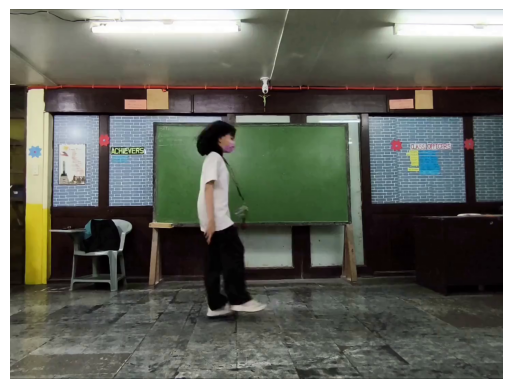

In [3]:
import cv2
from matplotlib import pyplot as plt
from pathlib import Path
from constants import globals as g

def show_first_frame(video_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Check if the video file opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return
    
    # Read the first frame
    ret, frame = cap.read()
    
    # Check if frame reading was successful
    if not ret:
        print("Error: Could not read frame.")
        return
    
    # Convert the frame from BGR to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Display the frame using matplotlib
    plt.imshow(frame_rgb)
    plt.axis('off')  # Hide the axes
    # plt.title('First Frame')
    plt.show()
    
    # Release the video capture object
    cap.release()

# Example usage
video_path = Path(g.PROCESSED_DIR, "center-1_gallop_1_2.mp4")
show_first_frame(video_path)


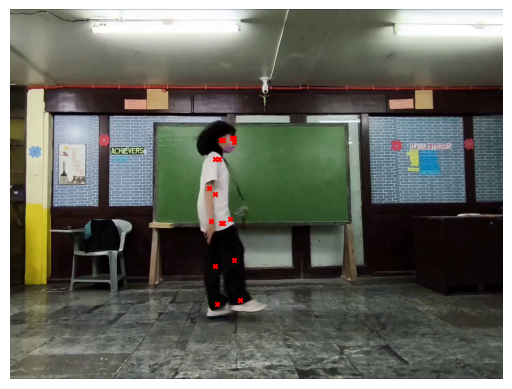

In [16]:
import cv2
import pickle
from matplotlib import pyplot as plt

def show_first_frame_with_keypoints(video_path, keypoints_path):
    # Open the video file
    cap = cv2.VideoCapture(video_path)
    
    # Check if the video file opened successfully
    if not cap.isOpened():
        print("Error: Could not open video.")
        return
    
    # Read the first frame
    ret, frame = cap.read()
    
    # Check if frame reading was successful
    if not ret:
        print("Error: Could not read frame.")
        return

    # Convert the frame from BGR to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    # Load keypoints from the .pkl file
    with open(keypoints_path, 'rb') as f:
        keypoints = pickle.load(f)
    
    # Plot the frame
    plt.imshow(frame_rgb)
    
    # Plot the keypoints
    for point in keypoints['keypoint'][0][0]:
        plt.scatter(point[0], point[1], s=10, c='red', marker='x')
    

    plt.axis('off')
    plt.show()
    cap.release()

# Example usage
video_path = Path(g.PROCESSED_DIR, "center-1_gallop_1_2.mp4")
keypoints_path = Path(g.GROSSMOTOR_DIR_PK, "center-cropped", "center-1_gallop_1_2.pkl")
show_first_frame_with_keypoints(video_path, keypoints_path)